In [5]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

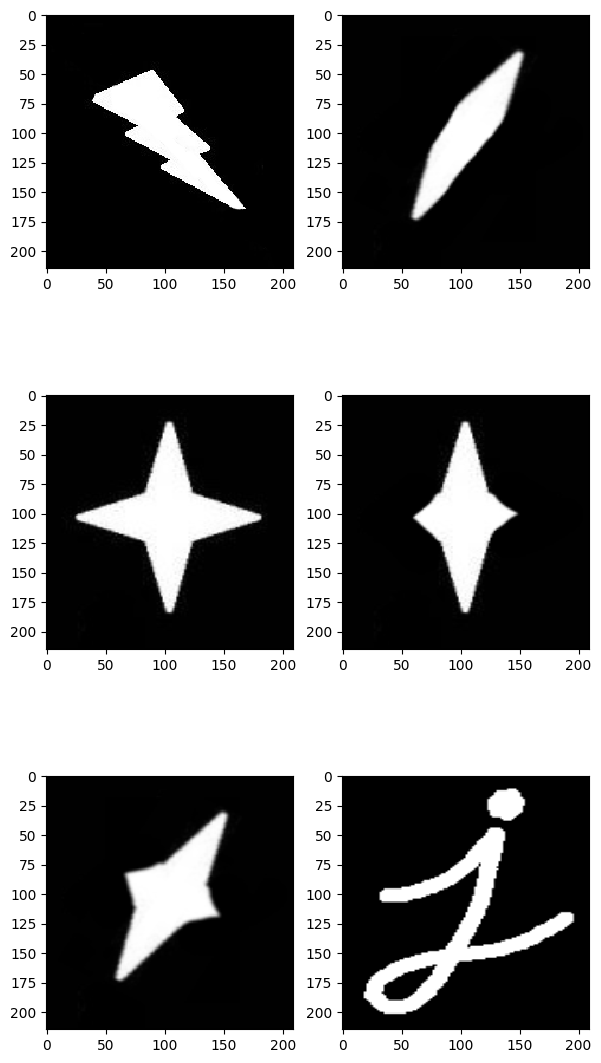

In [8]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
blob = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
star = cv2.resize(star, (lightningbolt.shape[1], lightningbolt.shape[0]))
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedstar = cv2.resize(squishedstar, (lightningbolt.shape[1], lightningbolt.shape[0]))
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.resize(squishedturnedstar, (lightningbolt.shape[1], lightningbolt.shape[0]))
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
letterj = cv2.resize(letterj, (lightningbolt.shape[1], lightningbolt.shape[0]))

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [3]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [ ]:
# TODO
# I would expect it to be 2 but there are many different intensities of greyscale.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


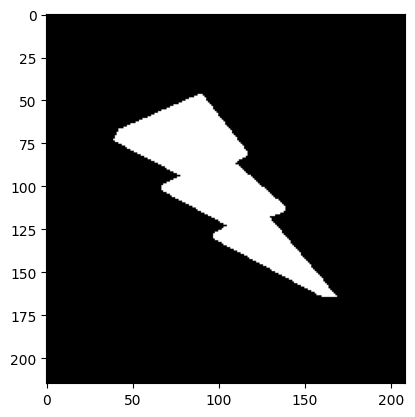

In [5]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [6]:
# TODO
# It assigns either white or black to the greyscale image. Any pixel above 200 is set to 255 or white, any pixel 200 and below is set to 0 or black.
# I would think it depends on the image.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

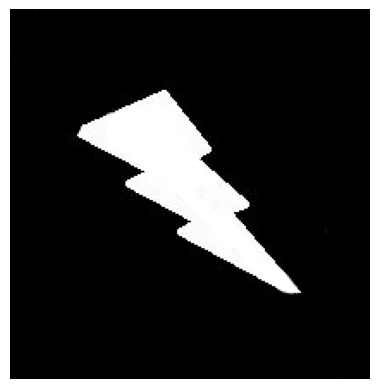

In [11]:
fig, ax = plt.subplots()
img_plot = ax.imshow(images[0], cmap='gray')
plt.axis('off')

for i in range(len(images)):
    img1 = images[i]
    img2 = images[(i + 1) % len(images)]

    img_plot.set_data(img1)
    display(fig)
    plt.pause(1.0)
    clear_output(wait=True)

    for i in np.linspace(0, 1, 30):
        blended = cv2.addWeighted(img1, 1 - i, img2, i, 0)
        img_plot.set_data(blended)
        display(fig)
        plt.pause(0.03)
        clear_output(wait=True)

plt.close()


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

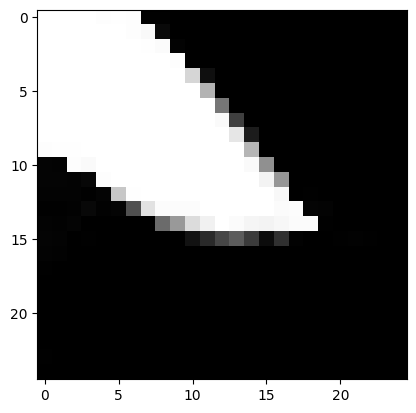

In [18]:
# 2. ROI
#plt.imshow(lightningbolt, cmap='gray')
lightningbolt_tip = lightningbolt[150:175,150:175]
plt.imshow(lightningbolt_tip,cmap='gray')

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

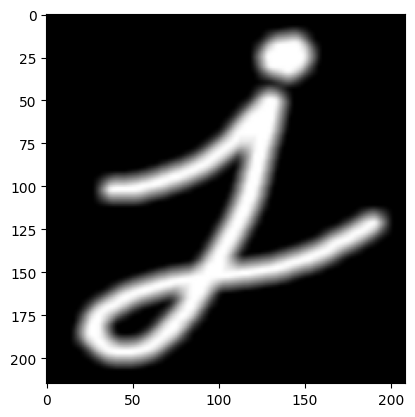

In [29]:
# 3. 
kernel = np.ones((10,10),np.float32)/100
letterj_avg = cv2.filter2D(letterj,-1,kernel)
#plt.imshow(letterj, cmap='gray')
plt.imshow(letterj_avg, cmap='gray')

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

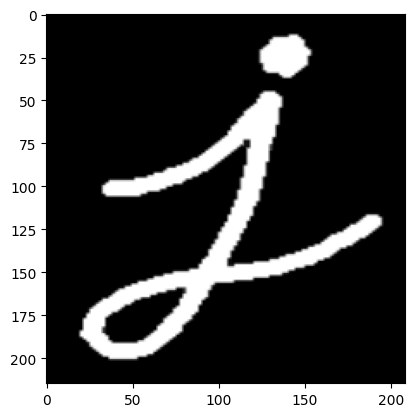

In [35]:
# 4
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

## 5. Perform erosion on j with a 5x5 kernel

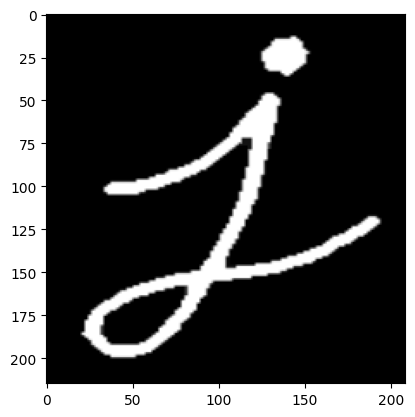

In [36]:
# 5
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



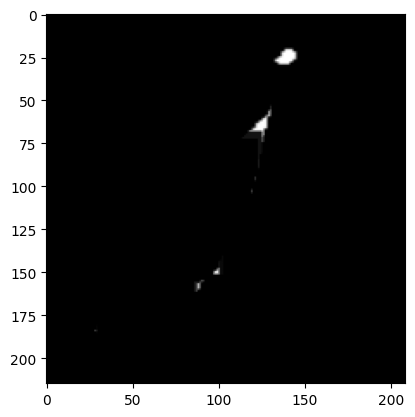

In [37]:
# 6
kernel = np.ones((8,8),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosion, cmap="gray")

## 7. Perform dilation on j with a 3x3 kernel

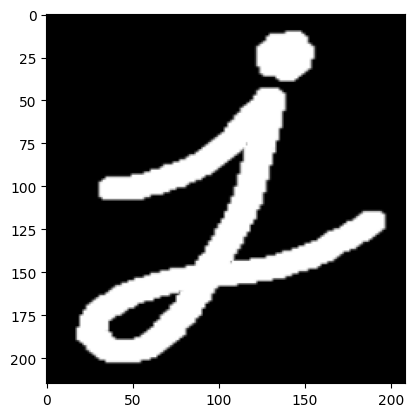

In [40]:
# 7
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

## 8. Perform dilation on j with a 5x5 kernel

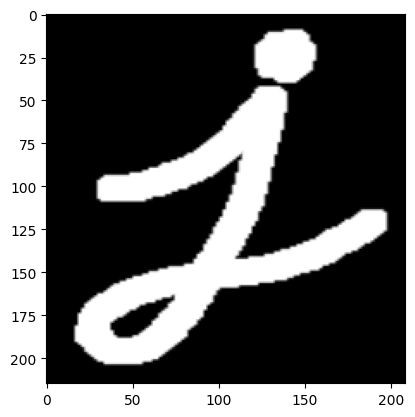

In [41]:
# 8
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

## 9. What is the effect of kernel size on morphology operations?

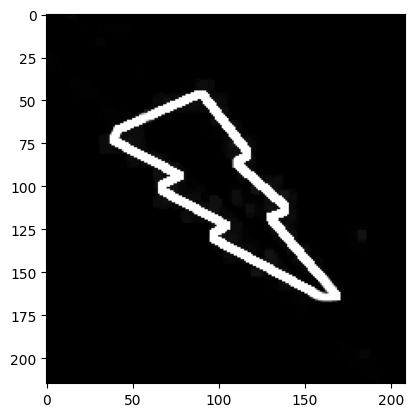

In [ ]:
# 9
# creates a outline of the object in the image
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(lightningbolt, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap="gray")

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

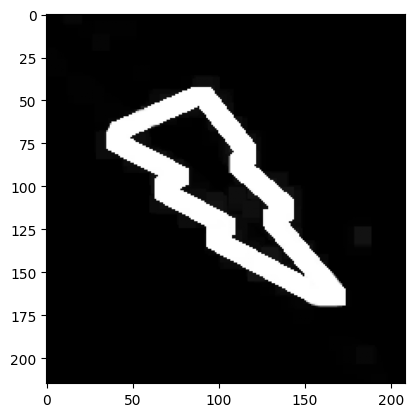

In [ ]:
# 10
# same effect
#kernel = np.ones((2,2),np.uint8)
#gradient = cv2.morphologyEx(lightningbolt, cv2.MORPH_GRADIENT, kernel, iterations=10)
kernel = np.ones((10,10),np.uint8)
gradient = cv2.morphologyEx(lightningbolt, cv2.MORPH_GRADIENT, kernel, iterations=1)
plt.imshow(gradient, cmap="gray")

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

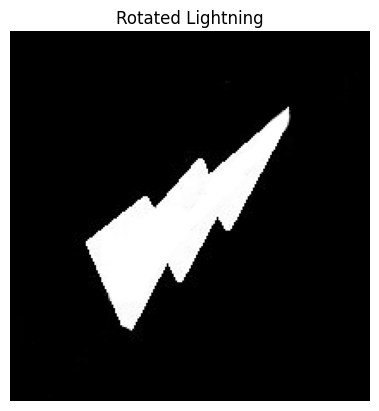

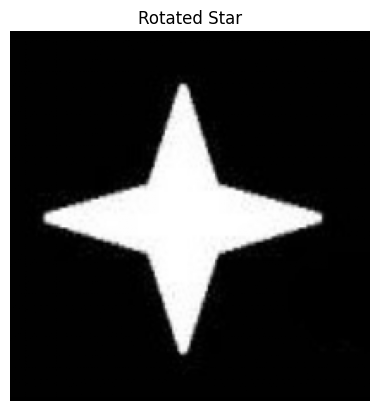

In [49]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
lightningbolt_new = cv2.warpAffine(lightningbolt, M, (cols, rows))

rows, cols = star.shape[:2]
star_new = cv2.warpAffine(star, M, (cols, rows))

plt.imshow(lightningbolt_new, cmap='gray')
plt.title('Rotated Lightning')
plt.axis('off')
plt.show()
plt.imshow(star_new, cmap='gray')
plt.title('Rotated Star')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

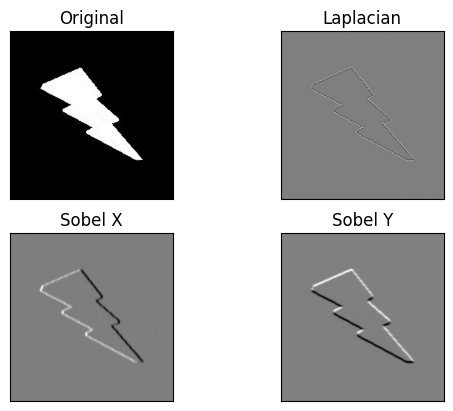

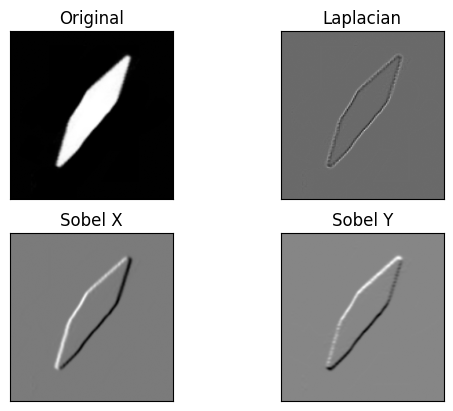

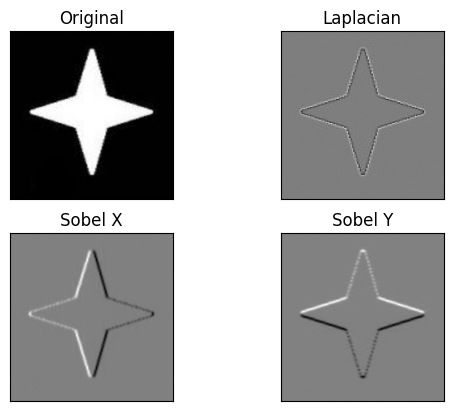

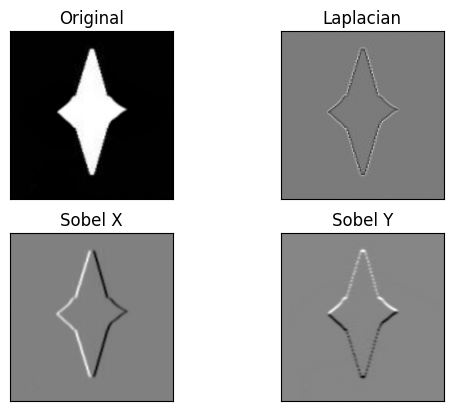

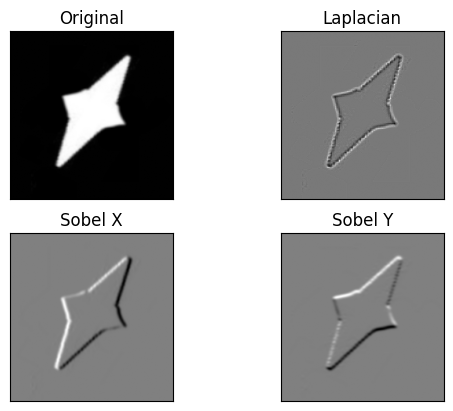

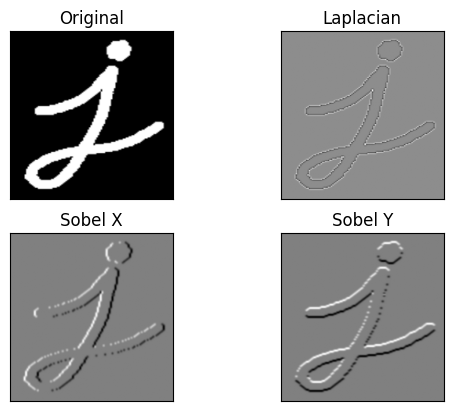

In [56]:
for i in images:
    img = i
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 